In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Restrict GPU memory consumption
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5000)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [4]:
np.random.seed(101)
tf.random.set_seed(101)
rand_a = np.random.uniform(0, 100, (5, 5))
rand_b = np.random.uniform(0, 100, (5, 1))
rand_a, rand_b

(array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
        [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
        [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
        [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
        [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]]),
 array([[99.43179012],
        [52.06653967],
        [57.87895355],
        [73.48190583],
        [54.19617722]]))

In [5]:
mul = tf.multiply(rand_a, rand_b)
added = tf.add(rand_a, rand_b)
mul, added

(<tf.Tensor: shape=(5, 5), dtype=float64, numpy=
 array([[5134.64399656, 5674.24997231,  283.12433109, 1705.4705322 ,
         6813.8317015 ],
        [4341.81240779, 1598.26688535, 4652.73408616, 3756.82921013,
          988.94640937],
        [3207.81130015, 2038.10290097, 1052.77419242, 4546.98078818,
         5588.11585809],
        [1707.3789896 ,  614.02533992, 4434.98883288, 5356.77771395,
         2029.85555814],
        [3714.09832466, 2806.64374096,  262.76765829,  747.19856325,
         1013.29197619]])>,
 <tf.Tensor: shape=(5, 5), dtype=float64, numpy=
 array([[151.07165289, 156.4985488 , 102.27921276, 116.58395574,
         167.95948829],
        [135.45622593,  82.76316164, 141.42784764, 124.22092585,
          71.06043509],
        [113.30171266,  93.09214895,  76.06819381, 136.43912973,
         154.42727579],
        [ 96.71727201,  81.83804919, 133.83674806, 146.38118156,
         101.10578868],
        [122.7268101 , 105.98292464,  59.04463097,  67.98310098,
        

# Example Neural Network

In [6]:
import tensorboard as tb

In [7]:
n_features = 10
n_dense_neurons = 3

In [57]:
W = tf.Variable(tf.random.normal([n_features, n_dense_neurons]))

b = tf.Variable(tf.ones(n_dense_neurons))

#x = [[1., 2., 3., 4., 5., 6., 7., 8., 9., 10.]]
#x = np.array(np.random.randn(1, n_features), dtype=np.float32)
x = np.random.randn(1, n_features).astype(np.float32)

In [58]:
xW = tf.matmul(x, W)
z = tf.add(xW, b)

#z = tf.constant()


In [61]:
#output = tf.keras.activations.sigmoid(z)
output = tf.sigmoid(z)

In [63]:
#output.numpy()
tf.print(output)

[[0.997869134 0.43977344 0.507219672]]


# Simple regression example

In [85]:
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
x_data

array([0.61983807, 2.00012575, 2.45575766, 4.39279228, 3.46430326,
       5.01637424, 5.28303084, 9.11790162, 7.84112545, 9.17848173])

In [86]:
y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
y_label

array([ 1.16928269,  2.60861098,  0.77525341,  1.83695987,  3.20972628,
        5.14806641,  7.17233182,  7.52174889,  8.36413995, 11.34536872])

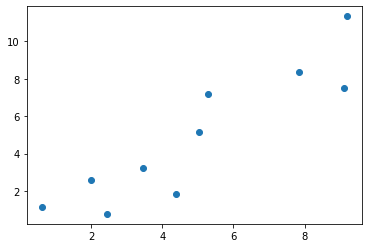

In [89]:
plt.scatter(x_data, y_label)

### y = mx + b

In [90]:
# Get some random numbers to fill variables
np.random.rand(2)

array([0.36060823, 0.52834171])

In [173]:
x_train = [1, 2, 3]
y_train = [1, 2, 3]

W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')


In [174]:
@tf.function
def cost():
    '''
    error = 0
    for x, y in zip(x_data, y_label):
        y_hat = W * x + b
        error += (y - y_hat)**2 # cost function
    return error
    '''
    y_model = W * x_train + b
    return tf.reduce_mean(tf.square(y_train - y_model))

[0.593834341]
[-0.288529247]


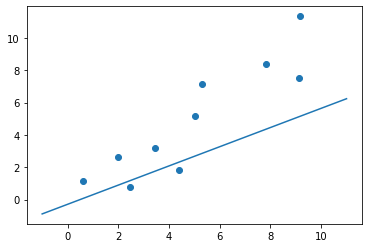

In [175]:
training_steps = 100

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
for i in range(training_steps):
    tf.keras.optimizers.Adam().minimize(cost, var_list=[W, b])
tf.print(W)
tf.print(b)

x_test = np.linspace(-1, 11, 10)

# y = mx + b
y_pred_plot = W * x_test + b

plt.scatter(x_data, y_label)
plt.plot(x_test, y_pred_plot)